In [12]:
import yaml
import os
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from ray import tune

In [13]:
# # Read ray tune experiment results
# experiment_name = "umap_hyperparameters_on_kuhar.standartized_balanced_starting_with_30.60.90...300"
# path = os.path.join("../ray_results", experiment_name)
# restored_tuner = tune.Tuner.restore(experiment_name, trainable=None)
# result_grid = restored_tuner.get_results()
# results_df = pd.DataFrame(result_grid)
# results_df

In [14]:
# data = pd.read_csv('umap_hyperparameters_on_kuhar.standartized_balanced_starting_with_30.60.90...300/data.csv')
data = pd.read_csv('experiments/test_convtae_1/data.csv')
data = pd.read_csv('experiments/test_convtae_1_repeated/data.csv')
# data = pd.read_csv('umap_hyperparameters_on_kuhar.standartized_balanced_starting_with_200/results/data.csv')

data

,Unnamed: 0,score,time_this_iter_s,done,training_iteration,trial_id,date,timestamp,time_total_s,pid,...,node_ip,time_since_restore,iterations_since_restore,config/latent_dim,config/model_lamda,config/num_CL,config/num_HL,config/size_CL,config/size_HL,logdir
0,0,0.520892,131.368761,True,1,33018b8e,2023-09-06_12-51-33,1694004693,131.368761,3078,...,172.17.0.2,131.368761,1,214,0.113493,4,6,21,31,/home/darlinne.soto/ray_results/test_convtae_1...
1,1,0.625587,85.248054,False,1,8594c3aa,2023-09-06_12-50-57,1694004657,85.248054,7241,...,172.17.0.2,85.248054,1,160,0.197205,7,3,13,107,/home/darlinne.soto/ray_results/test_convtae_1...
2,2,0.425352,111.876058,True,1,e0c0d31b,2023-09-06_12-51-38,1694004698,111.876058,7364,...,172.17.0.2,111.876058,1,275,1.602921,5,5,24,38,/home/darlinne.soto/ray_results/test_convtae_1...
3,3,0.634038,218.842761,False,1,523f0499,2023-09-06_12-53-37,1694004817,218.842761,7485,...,172.17.0.2,218.842761,1,14,0.201161,7,2,10,30,/home/darlinne.soto/ray_results/test_convtae_1...
4,4,0.450469,225.076710,True,1,3a75aa31,2023-09-06_12-53-55,1694004835,225.076710,7607,...,172.17.0.2,225.076710,1,55,1.126856,3,5,16,63,/home/darlinne.soto/ray_results/test_convtae_1...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1243,1243,0.593897,102.779936,False,1,39841264,2023-09-07_00-46-28,1694047588,102.779936,7607,...,172.17.0.2,102.779936,1,241,1.557807,7,4,30,38,/home/darlinne.soto/ray_results/test_convtae_1...
1244,1244,0.548592,192.602303,True,1,a9a39bdb,2023-09-07_00-48-31,1694047711,192.602303,7241,...,172.17.0.2,192.602303,1,266,1.037064,8,3,31,84,/home/darlinne.soto/ray_results/test_convtae_1...
1245,1245,0.166667,113.927177,True,1,38509d2c,2023-09-07_00-47-24,1694047644,113.927177,7485,...,172.17.0.2,113.927177,1,202,0.882564,8,2,2,136,/home/darlinne.soto/ray_results/test_convtae_1...
1246,1246,0.639437,93.972222,False,1,6c8077c5,2023-09-07_00-47-53,1694047673,93.972222,7364,...,172.17.0.2,93.972222,1,293,0.386494,8,3,25,132,/home/darlinne.soto/ray_results/test_convtae_1...


In [15]:
# data = pd.read_csv('umap_hyperparameters_on_kuhar.standartized_balanced_starting_with_200/results/data.csv')
# data

<Axes: >

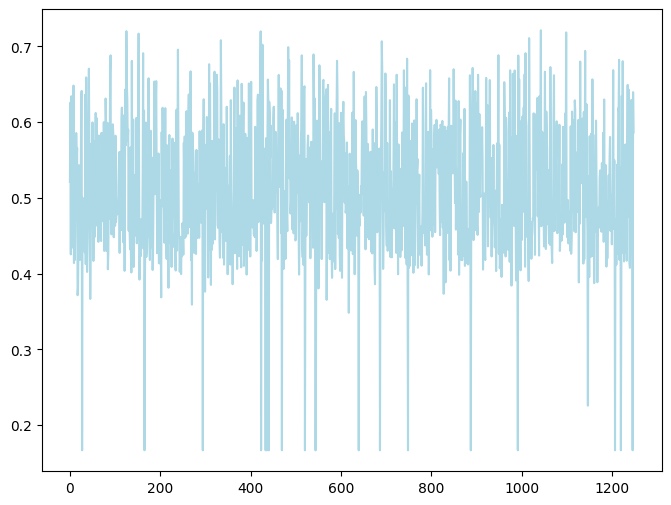

In [16]:
data['score'].plot(color='lightblue', figsize=(8, 6))

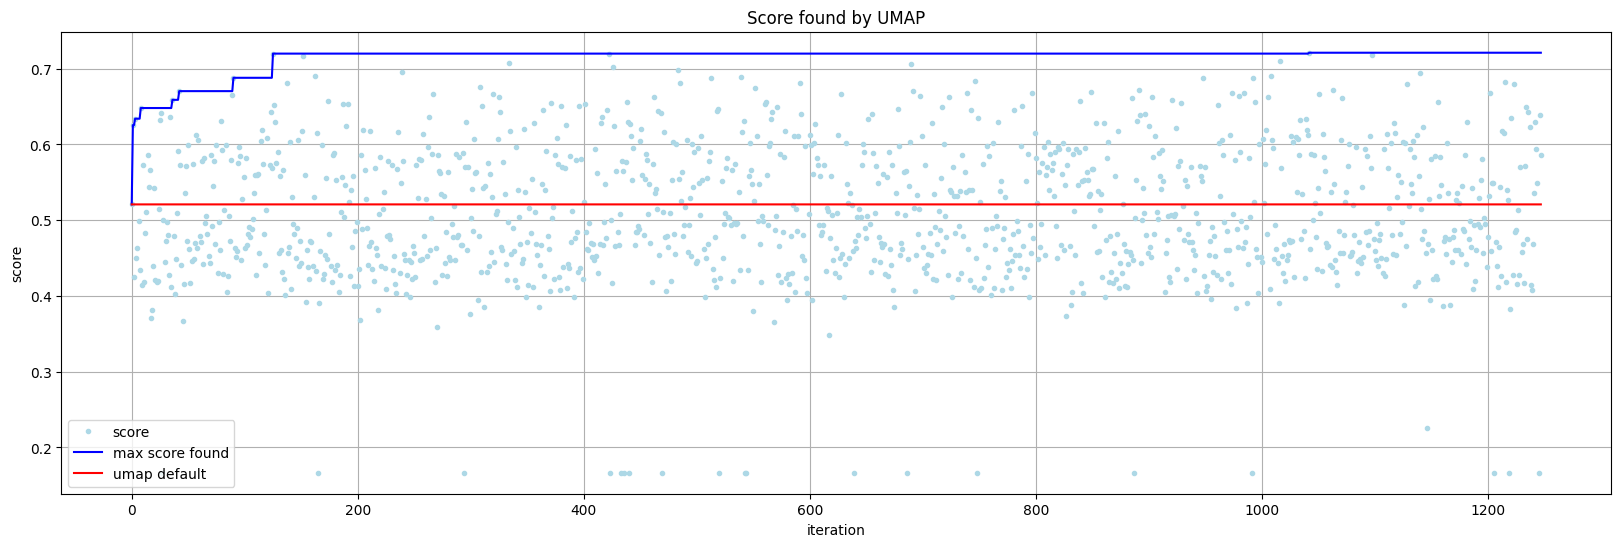

In [17]:
score1 = data.loc[0,'score']
data['score'].plot(color='lightblue', figsize=(20, 6), style='.')
data.cummax()['score'].plot(legend=True, label='max score found', color='blue')
plt.plot(list(range(len(data))), [score1]*len(data), color='red', label='umap default')
plt.legend()
plt.xlabel('iteration')
plt.ylabel('score')
plt.title('Score found by UMAP')
plt.grid()
# plt.show()


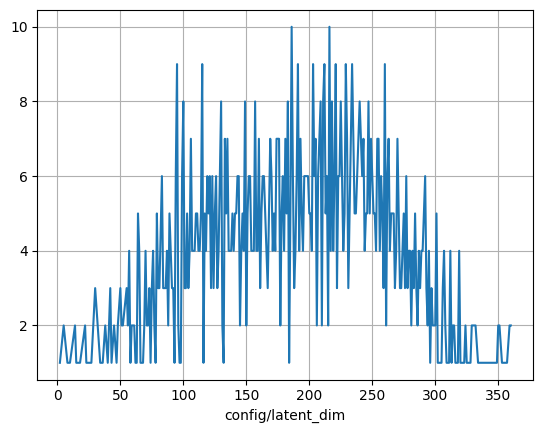

In [18]:
data.groupby('config/latent_dim').count()['score'].plot()
plt.grid()

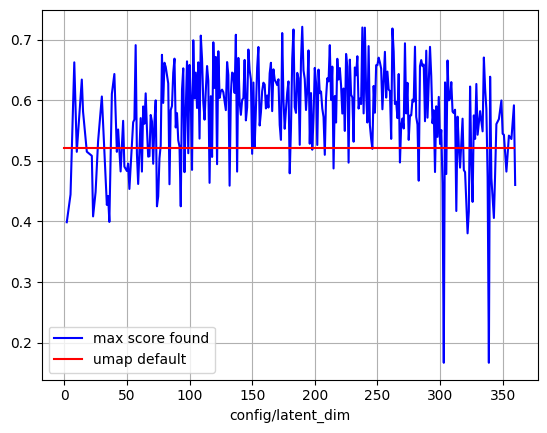

In [19]:
data.groupby('config/latent_dim').max()['score'].plot(legend=True, label='max score found', color='blue')
plt.plot(list(range(360)), [score1]*360, color='red', label='umap default')
plt.legend()
plt.grid()

<Axes: title={'center': 'score'}, xlabel='config/latent_dim'>

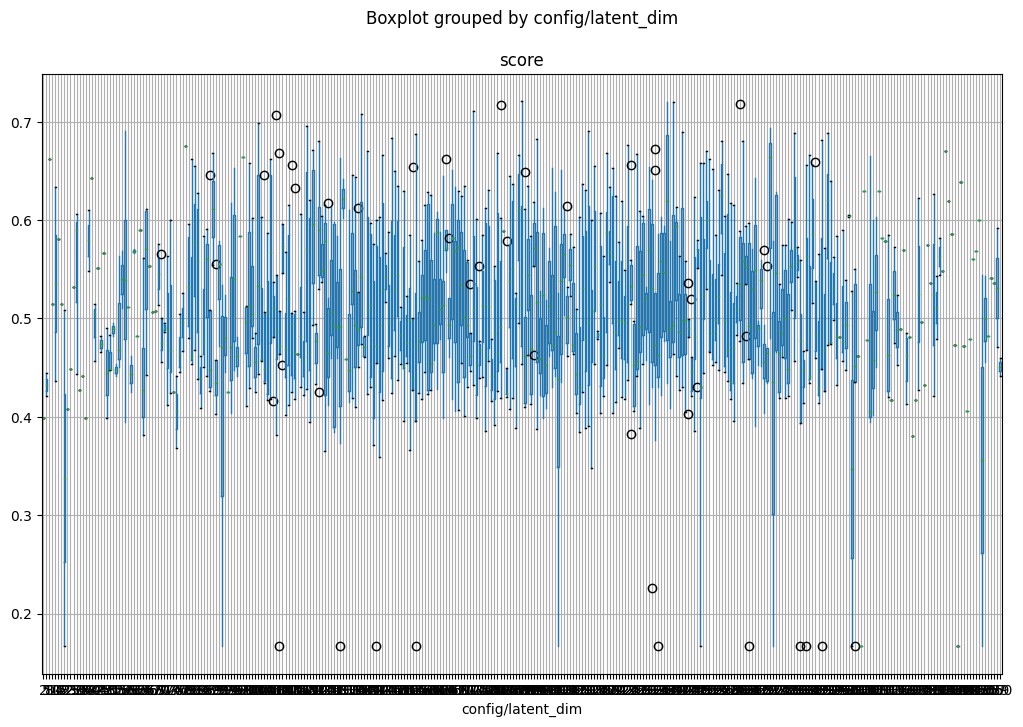

In [20]:
# data.groupby('config/umap_ncomp').boxplot(column='score')

# data.groupby('config/umap_spread').boxplot(column='score', by='config/umap_spread')

data.boxplot(column='score', by='config/latent_dim', figsize=(12,8))
# category = pd.cut(data['config/umap_ncomp'], bins=5, labels=['0.0-0.2', '0.2-0.4', '0.4-0.6', '0.6-0.8', '0.8-1.0'])
# print(category)
# data.boxplot(column='score', by=category, figsize=(12,8))
# plt.boxplot(data['score'])
# data.boxplot(column='score', by='config/umap_ncomp', figsize=(40,10))

| Trial name            | status     | loc               |   umap_mdist |   umap_neigh |   umap_spread |   iter |   total time (s) |    score |
| objective_7f36f_00006 | TERMINATED | 172.17.0.12:15622 |    0.926511  |           36 |            27 |      1 |          25.2358 | 0.416667 |

In [21]:
# | Trial name            | status     | loc               |   umap_mdist |   umap_neigh |   umap_spread |   iter |   total time (s) |    score |
# | objective_7f36f_00006 | TERMINATED | 172.17.0.12:15622 |    0.926511  |           36 |            27 |      1 |          25.2358 | 0.416667 |

In [22]:
# fig, ax = plt.subplots(1, 1, figsize=(10, 8))
# dims, scores, max_scores = read_and_create_graph("results_kuhar_std0.01_top5/results_for_kuhar_all_dim.yaml")
# ax.plot(dims, scores, label='Accuracy', linewidth=1.0, color='gray')
# ax.plot(dims, max_scores, label='Max Accuracy', linewidth=1.5, color='blue', linestyle='--')
# ax.grid()
# ax.set_title('Dimensionality vs. Accuracy - KH standartized_balanced')
# ax.set_xlabel('Dimensionality')
# ax.set_ylabel('Accuracy')
# ax.legend()
# ax.set_ylim(0.0, 1.0)